# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

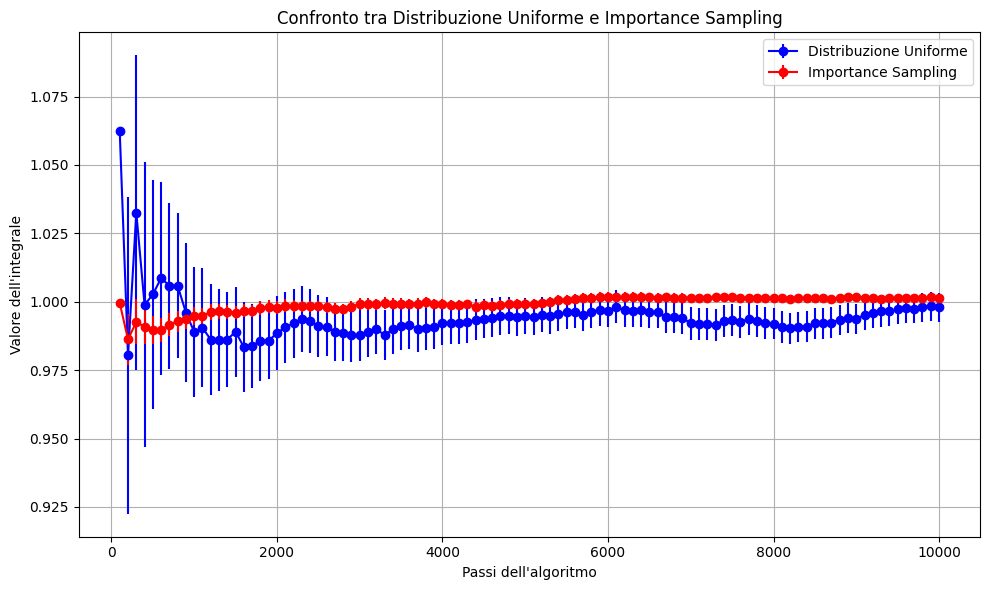

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati
n_unif, a_unif, err_unif = np.loadtxt("punto21unif.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)
n_imp, a_imp, err_imp = np.loadtxt("punto21impsampling.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Grafico per l'estrazione uniforme
plt.errorbar(n_unif * 100, a_unif, yerr=err_unif, fmt='-o', color='b', label='Distribuzione Uniforme')

# Grafico per l'importance sampling
plt.errorbar(n_imp * 100, a_imp, yerr=err_imp, fmt='-o', color='r', label='Importance Sampling')

# Configurazione delle etichette e del titolo
plt.xlabel('Passi dell\'algoritmo')
plt.ylabel('Valore dell\'integrale')
plt.title('Confronto tra Distribuzione Uniforme e Importance Sampling')
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Parametro k ottimale: 1.0000 ± 0.0000


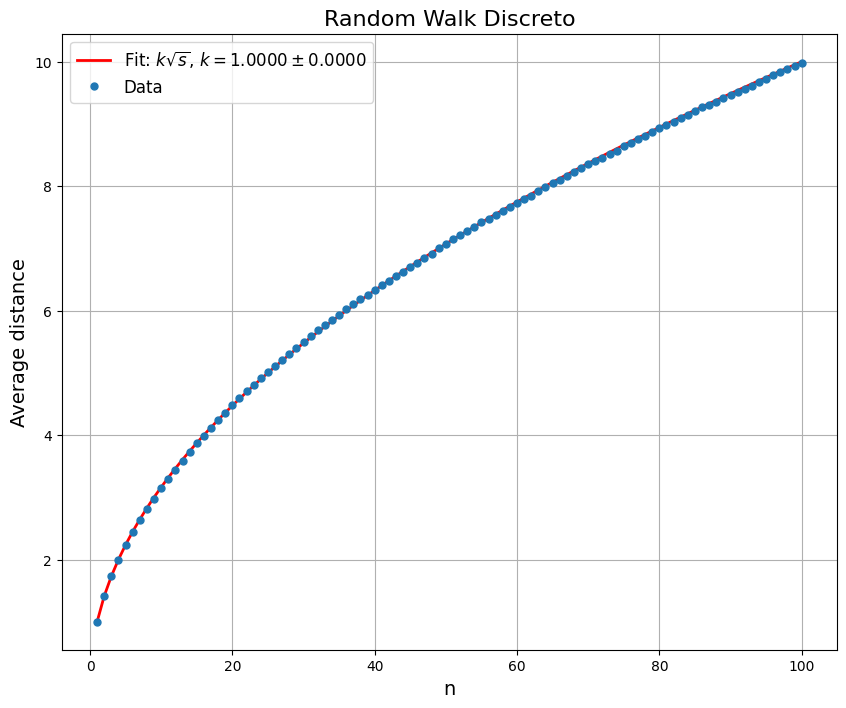

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Caricare i dati
n, a, err = np.loadtxt("RandomWalkDisc.out", usecols=(0,1,2), delimiter="\t", unpack=True)

# Gestire errori zero aggiungendo un piccolo valore
err[err == 0] = 1e-10

# Definire la funzione di fitting
def fit_function(x, k):
    return k * np.sqrt(x)

# Fare il fitting
popt, pcov = curve_fit(fit_function, n, a, sigma=err)

# Estrai i parametri ottimali
k_opt = popt[0]
k_err = np.sqrt(np.diag(pcov))[0]

# Stampare i parametri del fitting
print(f"Parametro k ottimale: {k_opt:.4f} ± {k_err:.4f}")

# Creare il grafico
plt.figure(figsize=(10, 8))  # Aumenta le dimensioni del grafico

# Incrementare la dimensione dei marker e la larghezza delle linee
plt.errorbar(n, a, fmt='o', label='Data', capsize=5, markersize=5, elinewidth=2)
plt.plot(n, fit_function(n, *popt), 'r-', label=f'Fit: $k\sqrt{{s}}$, $k={k_opt:.4f} \pm {k_err:.4f}$', linewidth=2)

# Aggiungere etichette e titolo
plt.xlabel('n', fontsize=14)
plt.ylabel('Average distance', fontsize=14)
plt.title('Random Walk Discreto', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Visualizzare 
plt.show()

Parametro k ottimale: 0.6125 ± 0.0002


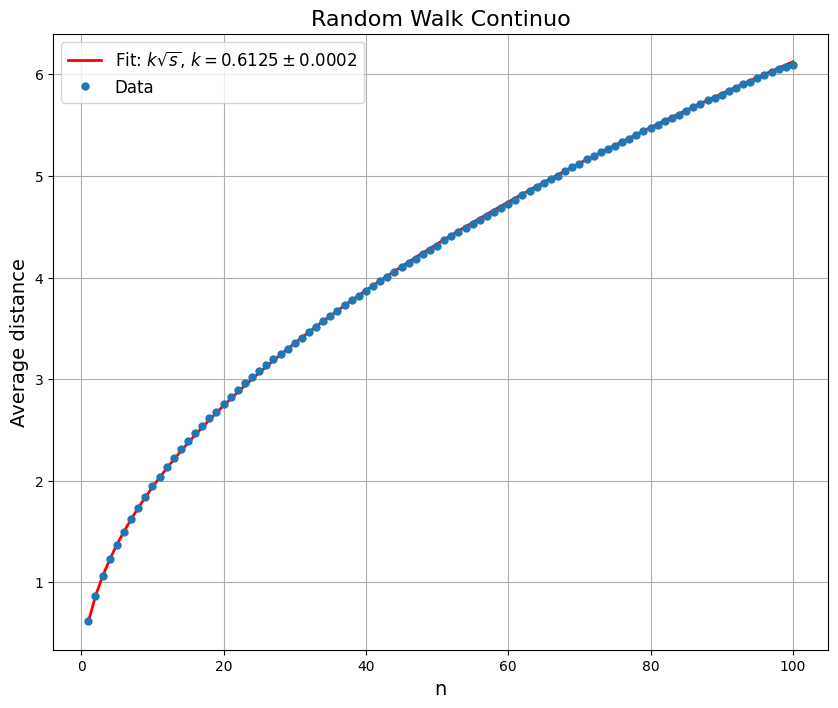

In [11]:
# Caricare i dati
n, a, err = np.loadtxt("RandomWalkCon.out", usecols=(0,1,2), delimiter="\t", unpack=True)

# Gestire errori zero aggiungendo un piccolo valore
err[err == 0] = 1e-10

# Definire la funzione di fitting
def fit_function(x, k):
    return k * np.sqrt(x)

# Fare il fitting
popt, pcov = curve_fit(fit_function, n, a, sigma=err)

# Estrai i parametri ottimali
k_opt = popt[0]
k_err = np.sqrt(np.diag(pcov))[0]

# Stampare i parametri del fitting
print(f"Parametro k ottimale: {k_opt:.4f} ± {k_err:.4f}")

# Creare il grafico
plt.figure(figsize=(10, 8))  # Aumenta le dimensioni del grafico

# Incrementare la dimensione dei marker e la larghezza delle linee
plt.errorbar(n, a, fmt='o', label='Data', capsize=5, markersize=5, elinewidth=2)
plt.plot(n, fit_function(n, *popt), 'r-', label=f'Fit: $k\sqrt{{s}}$, $k={k_opt:.4f} \pm {k_err:.4f}$', linewidth=2)

# Aggiungere etichette e titolo
plt.xlabel('n', fontsize=14)
plt.ylabel('Average distance', fontsize=14)
plt.title('Random Walk Continuo', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Visualizzare il grafico
plt.show()
